## Exploratory Data Analysis

**Importing all necessary libraries**

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [91]:
df=pd.read_csv('clean_data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,E.V_Type,Electric Range,Base MSRP,Vehicle Location
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,PHEV,42.0,0.0,POINT (-122.8728334 47.5798304)
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,BEV,151.0,0.0,POINT (-122.6961203 47.5759584)
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,BEV,266.0,0.0,POINT (-122.3340795 47.6099315)
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,BEV,84.0,0.0,POINT (-122.304356 47.715668)
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,BEV,238.0,0.0,POINT (-122.5715761 46.9095798)


**Graphing a pie chart to see the distribution of E.V_Type**

In [76]:
ev=df['E.V_Type'].value_counts()
ev_df=ev.reset_index()
ev_df

,E.V_Type,count
0,BEV,7215
1,PHEV,4924


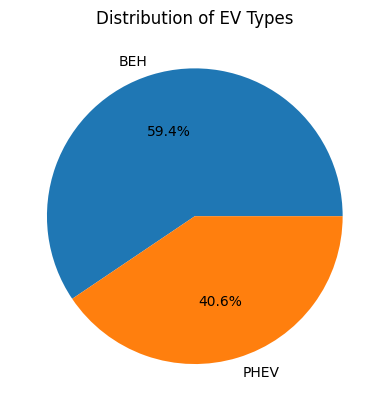

In [77]:
plt.pie(ev_df['count'], labels=['BEH','PHEV'], autopct='%1.1f%%')
plt.title('Distribution of EV Types')
plt.show()

**Graphing a box plot to see if there is any anomalies or outliers in Electric Range column**

,Electric Range,count
0,0.0,5018
43,6.0,44
79,8.0,20
95,9.0,9
63,10.0,25
...,...,...
59,293.0,32
89,308.0,11
91,322.0,11
85,330.0,11


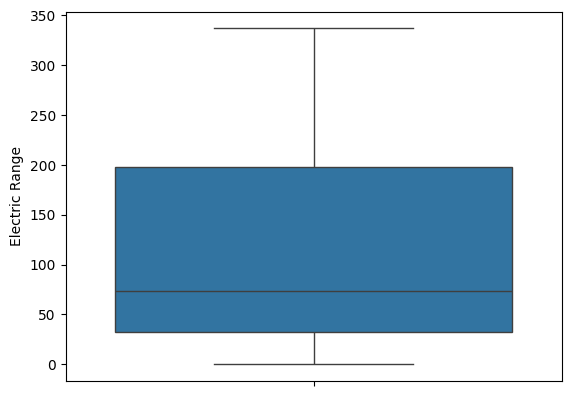

In [78]:
evr=df['Electric Range'].value_counts()
evr_df=evr.reset_index()
evr_df=evr_df.sort_values(by='Electric Range', ascending=True)

sns.boxplot(data=evr_df['Electric Range'])
evr_df

**Graphing a distribution plot to see the distribution of Electric Ranges using Seaborn**

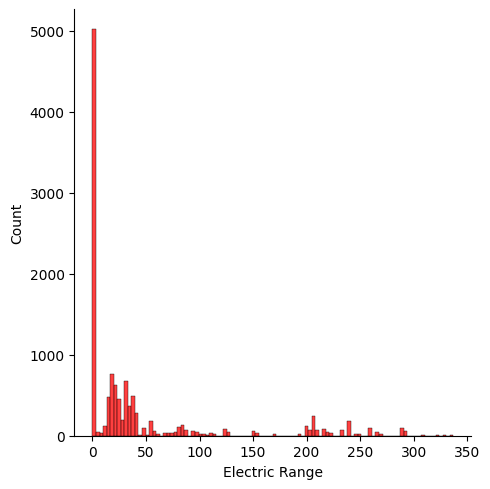

In [79]:
sns.displot(df['Electric Range'], color='r', label='Electric Range')

**Identifying the correlation between Electric Range and Base MSRP**

In [80]:
correlation = df['Electric Range'].corr(df['Base MSRP'])
print(f'The correlation between Electric Range and Base MSRP is {round(correlation, 4)}')

The correlation between Electric Range and Base MSRP is 0.1509


<Axes: xlabel='Electric Range', ylabel='Base MSRP'>

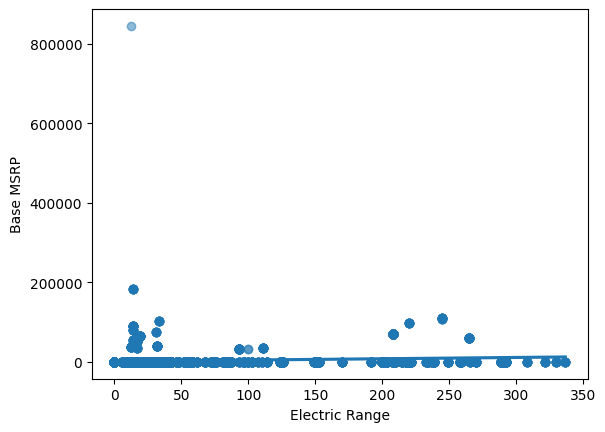

In [81]:
sns.regplot(x='Electric Range', y='Base MSRP', data=df, scatter_kws={'alpha':0.5})

**Making a sub-dataframe that contains the top 5 make brand and their corresponding count of vehicles** 

In [82]:
top5_make = df['Make'].value_counts().nlargest(5)
top5_df = top5_make.reset_index()
top5_df.columns=['Make','Count']
top5_df

,Make,Count
0,TESLA,1470
1,VOLVO,1175
2,FORD,1007
3,BMW,904
4,AUDI,894


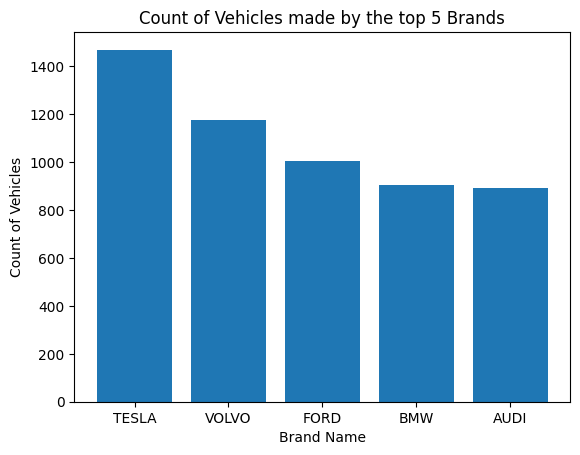

In [83]:
plt.bar(top5_df['Make'],top5_df['Count'])

plt.title('Count of Vehicles made by the top 5 Brands')
plt.xlabel('Brand Name')
plt.ylabel('Count of Vehicles')
plt.show()

**Making a histogram to see the distribution of Tesla cars models**

In [84]:
tesla_models = df[df['Make'] == 'TESLA']['Model'].value_counts()
tesla_df=tesla_models.reset_index()
tesla_df

,Model,count
0,MODEL S,519
1,MODEL X,484
2,MODEL 3,222
3,MODEL Y,194
4,ROADSTER,29
5,CYBERTRUCK,22


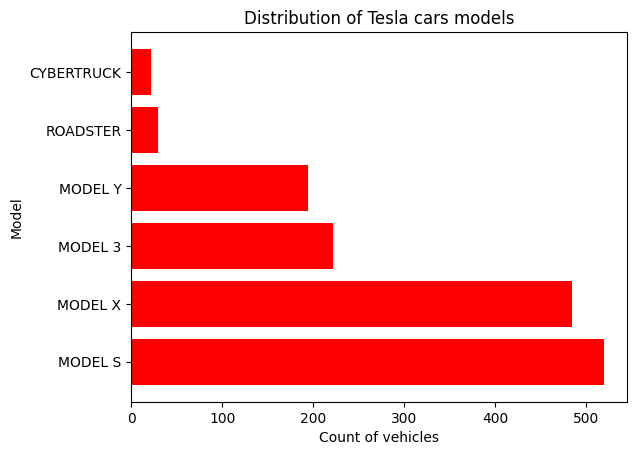

In [85]:
plt.barh(tesla_df['Model'], tesla_df['count'], color='r')
plt.xlabel('Count of vehicles')
plt.ylabel('Model')
plt.title('Distribution of Tesla cars models')
plt.show()

**Making a sub-dataframe for Model_Year and the count of vehicles made that year**

In [92]:
model_yr=df['Model Year'].value_counts()
modelyr_df=model_yr.reset_index()
modelyr_df.columns=['Year','Count']
modelyr_df=modelyr_df[modelyr_df['Year']!=2025] # exclude the year 2025
modelyr_df=modelyr_df.sort_values(by='Year') # sort values by year
modelyr_df.tail()

,Year,Count
4,2020,806
3,2021,1180
2,2022,1806
1,2023,2265
0,2024,2279


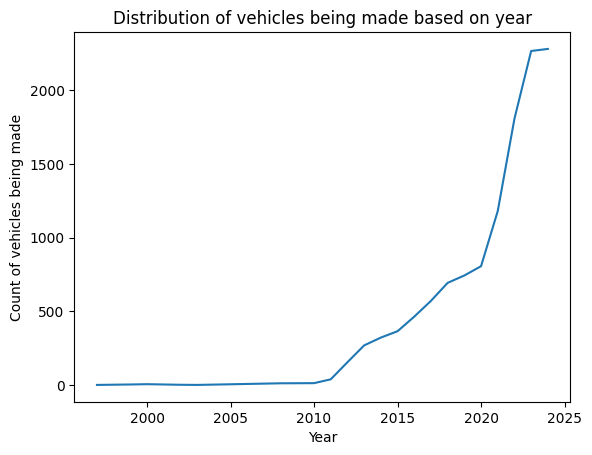

In [87]:
plt.plot(modelyr_df['Year'],modelyr_df['Count'])
plt.title('Distribution of vehicles being made based on year')
plt.xlabel('Year')
plt.ylabel('Count of vehicles being made')
plt.show()

**Making a column chart to see the distribution of top 10 cities where electric vehicles were registered**

In [88]:
city=df['City'].value_counts().head(10)
df_city=city.reset_index()
df_city

,City,count
0,Seattle,2678
1,Bellevue,984
2,Kirkland,805
3,Vancouver,783
4,Redmond,398
5,Sammamish,345
6,Olympia,323
7,Renton,287
8,Bothell,282
9,Kent,249


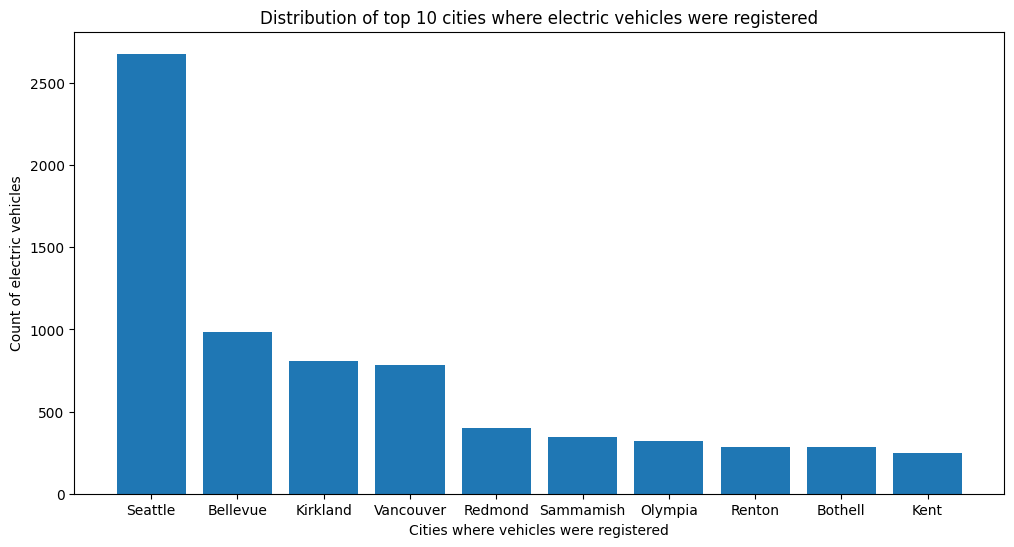

In [90]:
plt.figure(figsize=(12,6))
plt.bar(df_city['City'], df_city['count'])
plt.xlabel('Cities where vehicles were registered')
plt.ylabel('Count of electric vehicles')
plt.title('Distribution of top 10 cities where electric vehicles were registered')
plt.show()